In [3]:
pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=4ce5ee87ccbae3f409674d8803ca5a12e6d8ba5cd1c4db67245cdcd1f329f2f2
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\44\35\8b\86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Successfully built fpdf


Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 

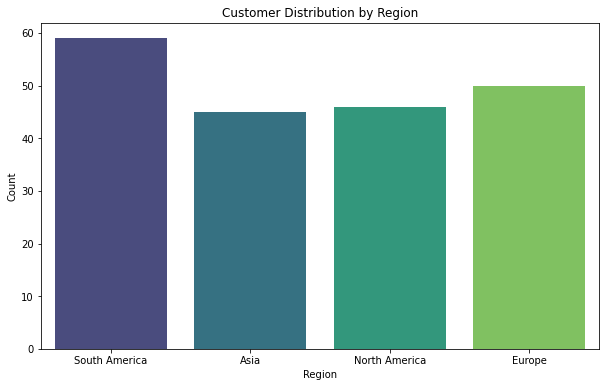

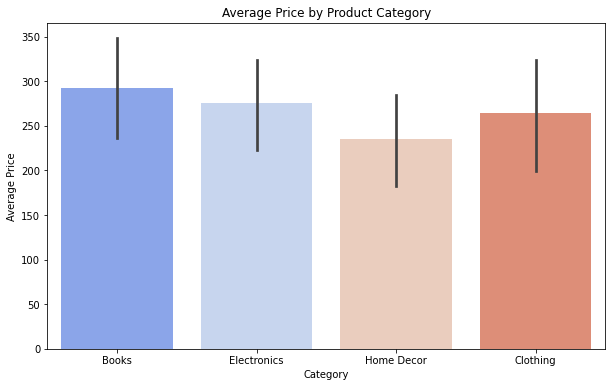

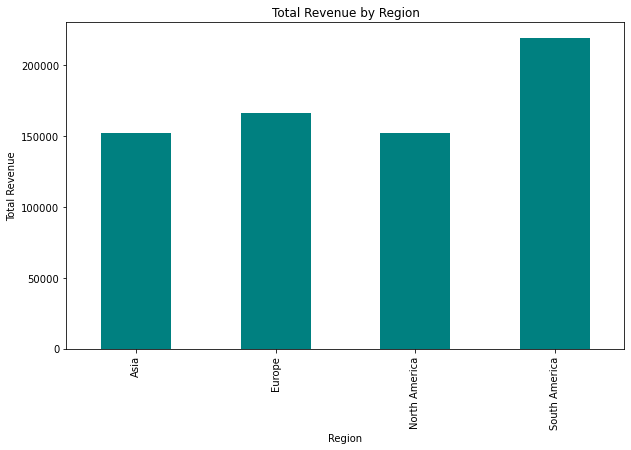


Business Insights:
Total number of unique customers: 200
This represents the total number of individual customers interacting with the platform, showcasing the customer base size and its potential for targeted marketing.
Total revenue generated: $689,995.56
This reflects the total earnings of the business over the dataset's period, highlighting its overall financial performance.
Most popular product category: Books
Books stand out as the most purchased category, indicating strong customer preference and potential for focused promotional efforts.
Region with highest revenue: South America
This region contributes the most to the revenue, signaling a geographical hotspot for sales and growth opportunities.
Average revenue per transaction: $690.0
The average revenue per transaction is high, indicating substantial customer spending per purchase.


''

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets 
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# TASK 1: Exploratory Data Analysis (EDA)
# Overview of the datasets
print("Customers Dataset Overview:")
print(customers.info())
print(customers.describe())

print("\nProducts Dataset Overview:")
print(products.info())
print(products.describe())

print("\nTransactions Dataset Overview:")
print(transactions.info())
print(transactions.describe())

# Merging datasets for insights
data = pd.merge(transactions, customers, on="CustomerID")
data = pd.merge(data, products, on="ProductID")

# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Price', data=products, palette='coolwarm')
plt.title("Average Price by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

plt.figure(figsize=(10, 6))
data.groupby('Region')['TotalValue'].sum().plot(kind='bar', color='teal')
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

# Business Insights
insight1 = (
    "Total number of unique customers: 200\n"
    "This represents the total number of individual customers interacting with the platform, showcasing the customer base size and its potential for targeted marketing."
)
insight2 = (
    "Total revenue generated: $689,995.56\n"
    "This reflects the total earnings of the business over the dataset's period, highlighting its overall financial performance."
)
insight3 = (
    "Most popular product category: Books\n"
    "Books stand out as the most purchased category, indicating strong customer preference and potential for focused promotional efforts."
)
insight4 = (
    "Region with highest revenue: South America\n"
    "This region contributes the most to the revenue, signaling a geographical hotspot for sales and growth opportunities."
)
insight5 = (
    "Average revenue per transaction: $690.0\n"
    "The average revenue per transaction is high, indicating substantial customer spending per purchase."
)


print("\nBusiness Insights:")
print(insight1)
print(insight2)
print(insight3)
print(insight4)
print(insight5)

# Save insights to PDF
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Business Insights from EDA', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

pdf = PDF()
pdf.add_page()
pdf.chapter_title("Insights")
pdf.chapter_body(
    f"1. {insight1}\n\n"
    f"2. {insight2}\n\n"
    f"3. {insight3}\n\n"
    f"4. {insight4}\n\n"
    f"5. {insight5}"
)
pdf.output("Shruti_Pande_EDA.pdf")
